# Part 1 Exploratory Data Analysis (EDA)

In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [426]:
location = 'C:\\Users\\raymondk\\Desktop\\Study\\Python\\Python for Data Science and Machine Learning Bootcamp\\Course work\\Section 25 Neural Nets and Deep Learning\\TensorFlow_FILES\\DATA\\kc_house_data.csv'

In [427]:
df = pd.read_csv(location)
df.head(2)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15  
0        5650  
1        7639  

[2 rows x 21 columns]

# Looking for missing data

In [428]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

 # Visualizing Data

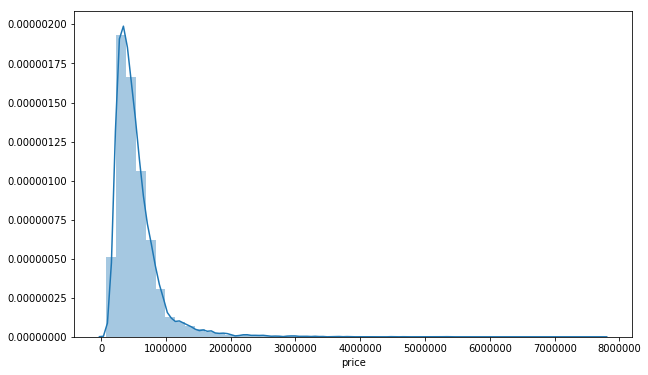

In [429]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

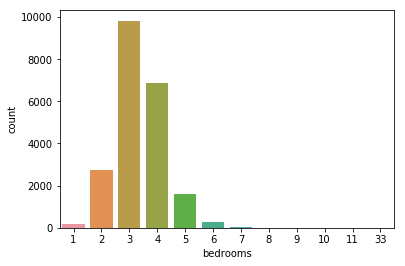

In [430]:
sns.countplot(df['bedrooms'])

In [431]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

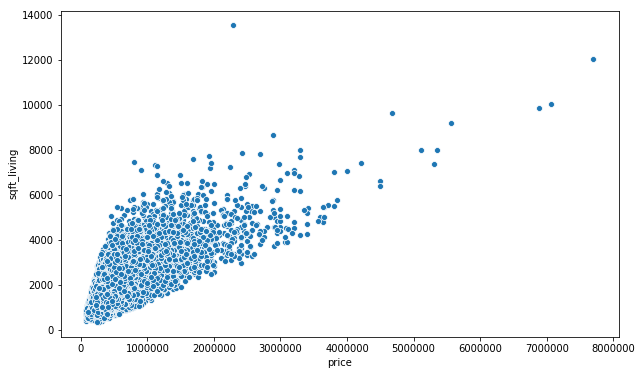

In [432]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

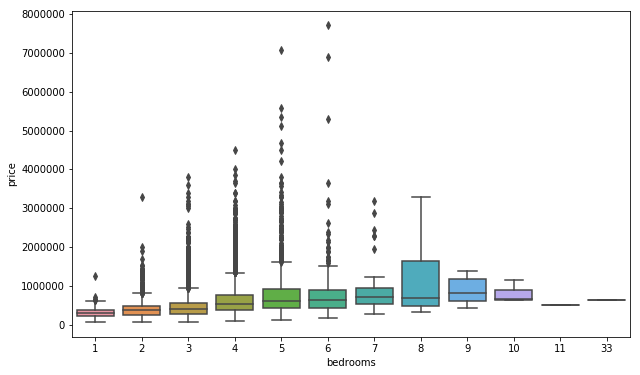

In [433]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)

# Creating a distribution plot using lat and long dropping out the top 1% of houses by price in king county

In [434]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

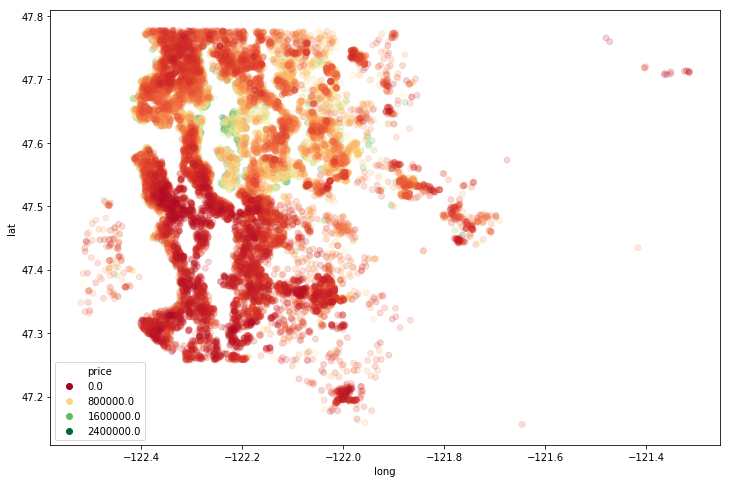

In [435]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,
                edgecolor = None,
                alpha=0.2,
                palette='RdYlGn',
                hue='price')

## Price distribution based on weather a propert is on the water front

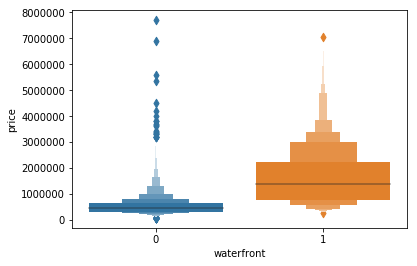

In [436]:
sns.boxenplot(x='waterfront',y='price',data=df)

# Part 2 Feature Engineering. 

In [437]:
df.head(2)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15  
0        5650  
1        7639  

[2 rows x 21 columns]

**Dropping features we don't need.**

In [438]:
df = df.drop('id',axis=1)

**Evaluating the date column**

In [439]:
type(df['date'][0])

str

In [440]:
df['date']=pd.to_datetime(df['date'])

In [441]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

**Creating a year and month column using the date column**

In [442]:
df['year'] = df['date'].apply(lambda date : date.year)
df['month'] = df['date'].apply(lambda date : date.month)

**Quick EDA with new features**

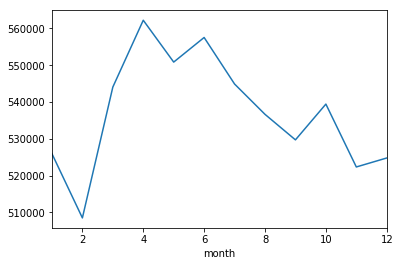

In [443]:
df.groupby('month').mean()['price'].plot()

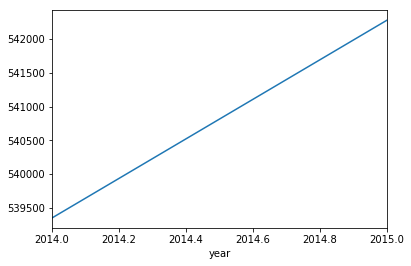

In [444]:
df.groupby('year').mean()['price'].plot()

**Dropping the date column as it is no longer needed along with the zipcode column**

In [445]:
df = df.drop(['date','zipcode'],axis=1)
df.head(2)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   

       lat     long  sqft_living15  sqft_lot15  year  month  
0  47.5112 -122.257           1340        5650  2014     10  
1  47.7210 -122.319           1690        7639  2014     12

In [446]:
#df['yr_renovated'].value_counts()

In [447]:
#df['sqft_basement'].value_counts()

# Part 2 Phase 2

## Removing features from target

In [448]:
X= df.drop('price',axis=1).values
y = df['price'].values

## Creating Train test split

In [449]:
from sklearn.model_selection import train_test_split

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Scalling and fitting the data

In [451]:
from sklearn.preprocessing import MinMaxScaler

In [452]:
scaller = MinMaxScaler()

In [453]:
#Scalling and fitting the traning data
X_train = scaller.fit_transform(X_train)

In [454]:
X_test = scaller.transform(X_test)

## Creating model

In [455]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [456]:
# The number of neorons in the model is based on the size of the data 
X_train.shape

(15117, 19)

In [457]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Fitting the model to the training data

**Using the test data the model will check for over fitting, the batch is in powers of 2 and is used when the validation dataset is large**

In [458]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=850,verbose=0)

# Part 3 Analyzing the model

In [459]:
losses = pd.DataFrame(model.history.history)

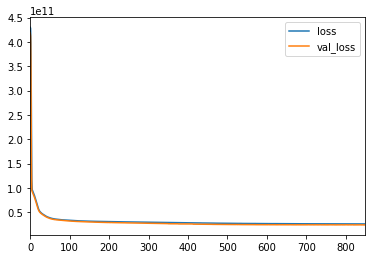

In [460]:
losses.plot()

## Plot analysis
**Plotted values**

1. Loss relates to the loss over the training set
2. Val_loss relates to loss over the testing set

**Graph analysis**

1. Both the loss and val_loss plot line keeps going down this indicates that the model can still train further i.e. a higher epochs value can be set
2. Once the val_loss line crosses the loss line it is a sign of over fitting the model

## Evaluating the model

In [461]:
predictions = model.predict(X_test)

## Creating Evaluation function

In [462]:
def model_analysis (y_true,predicts):
    '''
    This function will import and calculate sklearn matrics
    1) Mean Squared Error
    2) Mean Absolute Error
    3) Explained Variance Score
    4) Calculate the %Error beteween the Data frame mean and the Mean Absolute Error 
    The results wil be returned as a dataframe as well as writen to a excell file.
    '''
    #Importing metrics
    from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
    
    #Calculating values
    mean_val = df.describe().transpose()['mean']['price']
    mse = mean_squared_error(y_true,predicts)
    rmse = np.sqrt(mse)
    mae= mean_absolute_error(y_true,predicts)
    error = round(((mae / mean_val)*100),2)    
    Expl_var = explained_variance_score(y_true,predicts)
    
    #Creating DataFrame
    data = {'Mean Squared Error': [format(mse,'f')],
            'Route Mean Squared Error': [format(rmse,'f')],
            'Mean Absolute Error': [format(mae,'f')],
            'Error% (DF_MEAN VS MAE) ': [format(error,'.2f')],
            'Explained Variance Score': [format(Expl_var,'f')]
           }
    df_Analysis = pd.DataFrame(data).transpose()
    df_Analysis.columns=['Value']
    
    #Writing results to excell
    df_Analysis.to_excel('model analysis.xlsx')
    return df_Analysis

In [464]:
model_analysis(y_test,predictions)

Value
Mean Squared Error        24120330683.964951
Route Mean Squared Error       155307.213883
Mean Absolute Error             96490.390989
Error% (DF_MEAN VS MAE)                17.86
Explained Variance Score            0.818285

## Plotting predictions vs a perfect set (the test set)

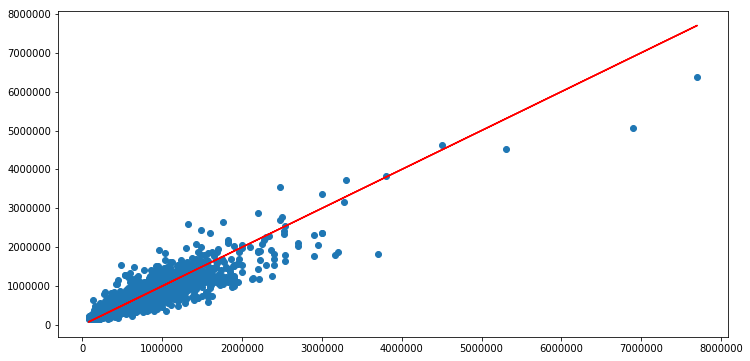

In [467]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')